In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import mixture
from sklearn import cluster
from sklearn import metrics
from sklearn import manifold
from sklearn import model_selection
from sklearn import ensemble
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings 
warnings.filterwarnings("ignore")

> ### Часть 3. Анализ данных и визуализация

*Признаки в итоговой таблице:* \
\
<b>population</b> - Численность населения,чел \
<b>cash_income</b> - Среднедушевые денежные доходы, руб \
<b>child_mort</b> - Детская смертность на душу населения , чел \
<b>borned</b> - Рождаемость на душу населения, чел \
<b>disabled</b> - Число инвалидов на душу населения , чел \
<b>grp</b> - Валовый региональный продукт на душу населения, руб \
<b>poverty_%</b>- Люди ,живущие за чертой бедности, % \
<b>Social_expenses_%</b> - Расходы на социальную политику, % \
<b>retail</b> - Оборот розничной торговли на душу населения, руб \
<b>poverty_deti_%</b> - Малоимущие дети, доля % \
<b>poverty_pens_%</b> - Малоимущие пенсионеры, доля % \
<b>poverty_trud_%</b> - Малоимущие трудоспособные, доля % \
<b>mining</b> - объем производимой добычи полезных ископаемых на душу населения, руб \
<b>industry</b> - объем производимой промышленности на душу населения, руб \
<b>manufacture</b> - объем производимого обрабатывающего производства на душу населения, руб \
<b>supply</b> - объем производимой электрической энергии, газом и паром на душу населения, руб \
<b>unemployed</b> - Численность безработных на душу населения, чел \
<b>drug</b> - заболеваемость впервые в жизни установленным диагнозом наркомании на 100 тыс. населения, чел \
<b>alco</b> - Заболеваемость впервые в жизни установленным диагнозом алкоголизма на 100 тыс. населения, чел \
<b>respiratory_d</b> - Заболеваемость ”болезни органов дыхания”, на 100 тыс человек населения, чел. \
<b>blood_d</b> - Заболеваемость ”Болезни системы кровообращения”, на 100 тыс человек населения, чел. \
<b>metabolic_d</b> - Заболеваемость ”Болезни эндокринной системы, расстройства питания и нарушения обмена веществ”, на 100 тыс человек населения, чел \
<b>all_disease</b> - Заболеваемость у пациентов с диагнозом, установленным впервые в жизни, на 100 тыс человек населения, чел. \
<b>square_liv</b> - Размер жилой площади в расчете на члена домохозяйства, м2 \

In [2]:
result_regions = pd.read_csv('social_russia_data/result_regions.csv', index_col='Регион')
result_regions.head()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,respiratory_d,blood_d,metabolic_d,all_disease,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1.528216e+06,31222.4,0.000044,1.628376,578765.06,7.68,14.74,216128.2,29.400,8.233333,...,17286.678929,0.000000,0.010295,1.6,46.1,27195.7,3995.8,813.6,74637.4,17.8
Брянская область,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375,3.875000,...,14387.151274,0.000000,0.010074,13.2,107.9,33294.4,3201.2,1641.5,77439.0,24.1
Владимирская область,1.449906e+06,24147.6,0.000052,1.044558,357923.42,13.20,22.96,162836.2,39.500,7.233333,...,26355.518325,0.024677,0.010033,10.7,75.7,46461.1,2715.0,1265.2,94163.6,0.0
Воронежская область,2.352667e+06,30634.2,0.000041,1.107079,405518.16,8.94,19.94,234238.2,36.225,5.400000,...,46790.873657,0.000000,0.009670,20.1,97.1,23444.6,4876.8,1589.2,55009.9,0.0
Ивановская область,1.076221e+06,25022.0,0.000040,0.880764,232553.00,14.36,26.96,163936.4,37.300,8.466667,...,29865.357966,0.000000,0.009846,3.8,88.6,47678.7,2858.0,1676.5,88473.5,18.1


In [3]:
result_regions.isnull().sum()

population           0
cash_income          0
child_mort           0
disabled             0
grp                  0
poverty_%            0
Social_expenses_%    0
retail               0
poverty_deti_%       0
poverty_pens_%       0
poverty_trud_%       0
mining               0
manufacturing        0
industry             0
supply               0
unemployed           0
borned               0
drug                 0
alco                 0
respiratory_d        0
blood_d              0
metabolic_d          0
all_disease          0
square_liv           0
dtype: int64

In [4]:
result_regions.describe()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,respiratory_d,blood_d,metabolic_d,all_disease,square_liv
count,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.748439e+06,30796.835294,0.000058,0.893499,6.432744e+05,14.788235,21.252706,184180.477647,38.520000,6.176471,...,40092.022581,0.013885,0.012202,9.138824,70.481176,36133.681176,3119.756471,1420.935294,79982.394118,16.321176
std,1.693082e+06,13249.940010,0.000031,0.265672,8.953064e+05,5.480914,4.426399,51943.036299,5.152505,2.104495,...,30508.060289,0.024615,0.002790,10.368095,52.298754,9801.407789,962.750164,522.536177,17440.366421,4.292632
min,4.258371e+04,16234.600000,0.000000,0.309457,1.345015e+05,5.860000,6.480000,49174.200000,16.833333,0.900000,...,2414.833742,0.000000,0.008322,0.000000,0.000000,14313.900000,1357.300000,598.900000,44792.000000,0.000000
25%,7.975911e+05,23454.800000,0.000046,0.754446,3.047154e+05,10.720000,19.940000,152320.600000,36.225000,4.950000,...,20942.535249,0.000000,0.010509,2.200000,41.600000,29633.500000,2486.200000,1102.200000,67012.900000,15.500000
50%,1.241397e+06,26939.600000,0.000053,0.896733,4.270128e+05,14.000000,21.980000,180102.800000,39.425000,5.625000,...,32905.648989,0.000000,0.011711,8.200000,75.000000,34749.200000,2894.300000,1346.600000,77439.000000,16.900000
75%,2.454000e+06,31385.800000,0.000067,1.044558,5.490237e+05,17.480000,24.220000,216919.000000,41.375000,7.500000,...,47213.161938,0.025502,0.012782,11.300000,98.100000,41421.500000,3616.800000,1700.200000,89949.900000,18.100000
max,1.147229e+07,80159.800000,0.000177,1.628376,6.408588e+06,34.760000,28.480000,380821.800000,48.866667,10.975000,...,198939.139489,0.157784,0.024560,66.800000,331.000000,70452.800000,6010.800000,3885.000000,138231.700000,27.800000


Краткие выводы по статистике:
- Максимальный среднедушевой доход ~80 тыс. руб, минимальный ~16 тыс.
- В среднем ~15% населения живут за чертой бедности, из них  ~37% дети.
- Минимальные траты на социальную политику в регионах составляет ~7%, максимальный ~28.5%. 

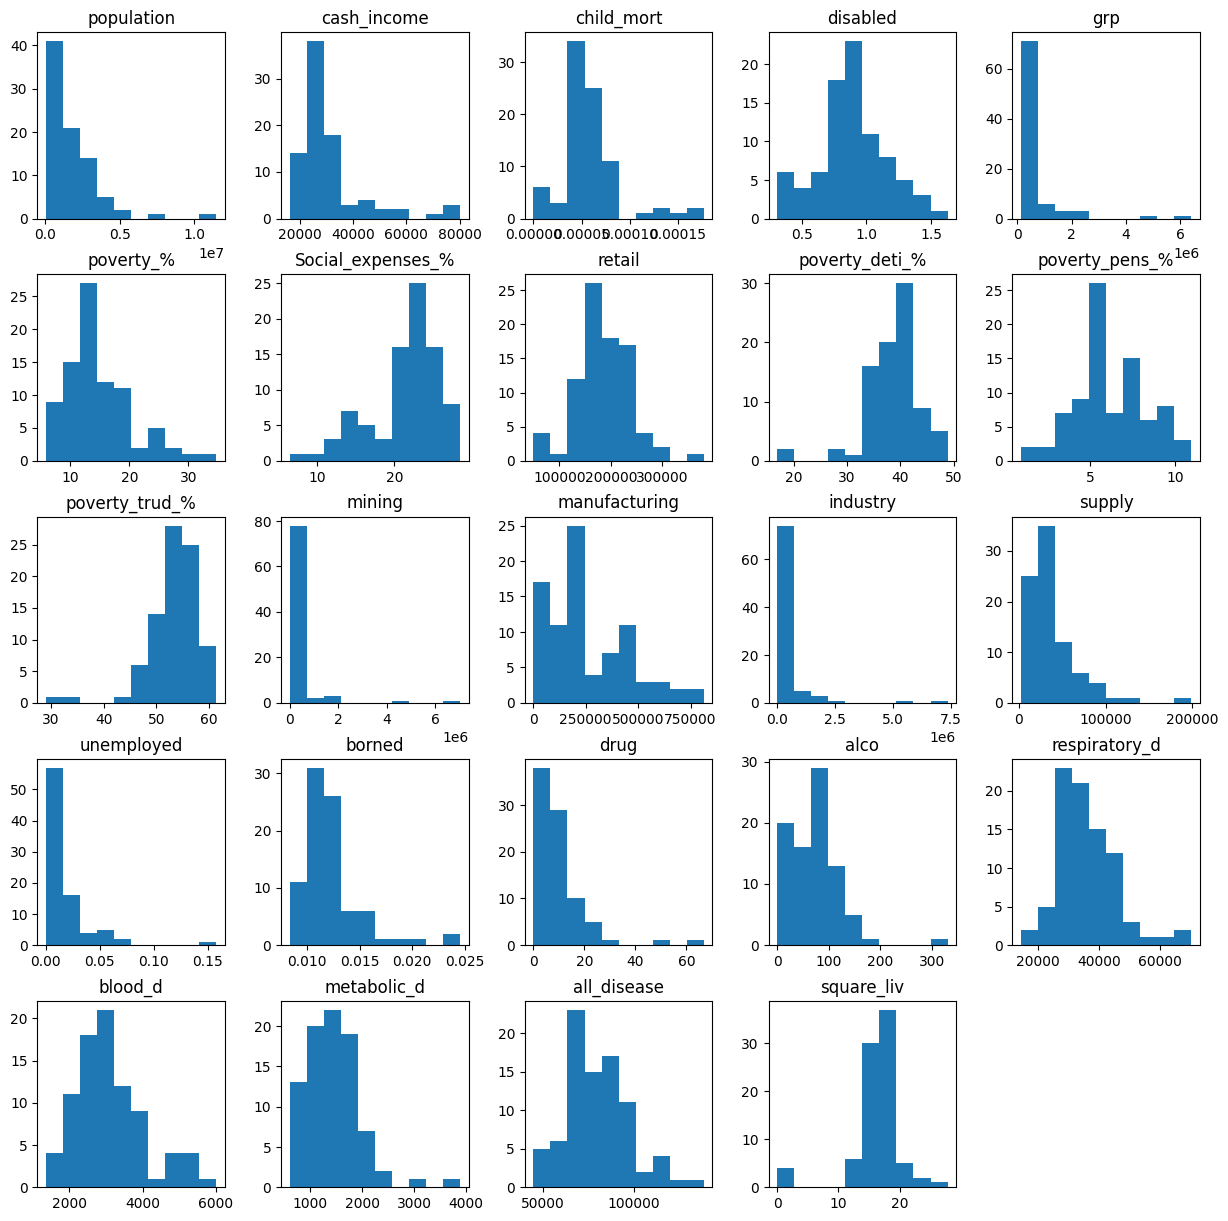

In [5]:
result_regions.hist(figsize = (15,15), grid = False)
plt.show()

In [6]:
for col in result_regions.columns:
    _, p = shapiro(result_regions[col])
    print(f'{col}:   p-value = {p:.3f}')

population:   p-value = 0.000
cash_income:   p-value = 0.000
child_mort:   p-value = 0.000
disabled:   p-value = 0.323
grp:   p-value = 0.000
poverty_%:   p-value = 0.000
Social_expenses_%:   p-value = 0.000
retail:   p-value = 0.021
poverty_deti_%:   p-value = 0.000
poverty_pens_%:   p-value = 0.237
poverty_trud_%:   p-value = 0.000
mining:   p-value = 0.000
manufacturing:   p-value = 0.000
industry:   p-value = 0.000
supply:   p-value = 0.000
unemployed:   p-value = 0.000
borned:   p-value = 0.000
drug:   p-value = 0.000
alco:   p-value = 0.000
respiratory_d:   p-value = 0.002
blood_d:   p-value = 0.001
metabolic_d:   p-value = 0.000
all_disease:   p-value = 0.021
square_liv:   p-value = 0.000


Тест Шапиро на нормальность распределения показывает, что только признаки 'disabled' и 'poverty_pens_%' (Число инвалидов на душу населения, % пенсионеров за чертой бедности) можно считать нормально распределенным (p-value = 0.323 и 0.237).

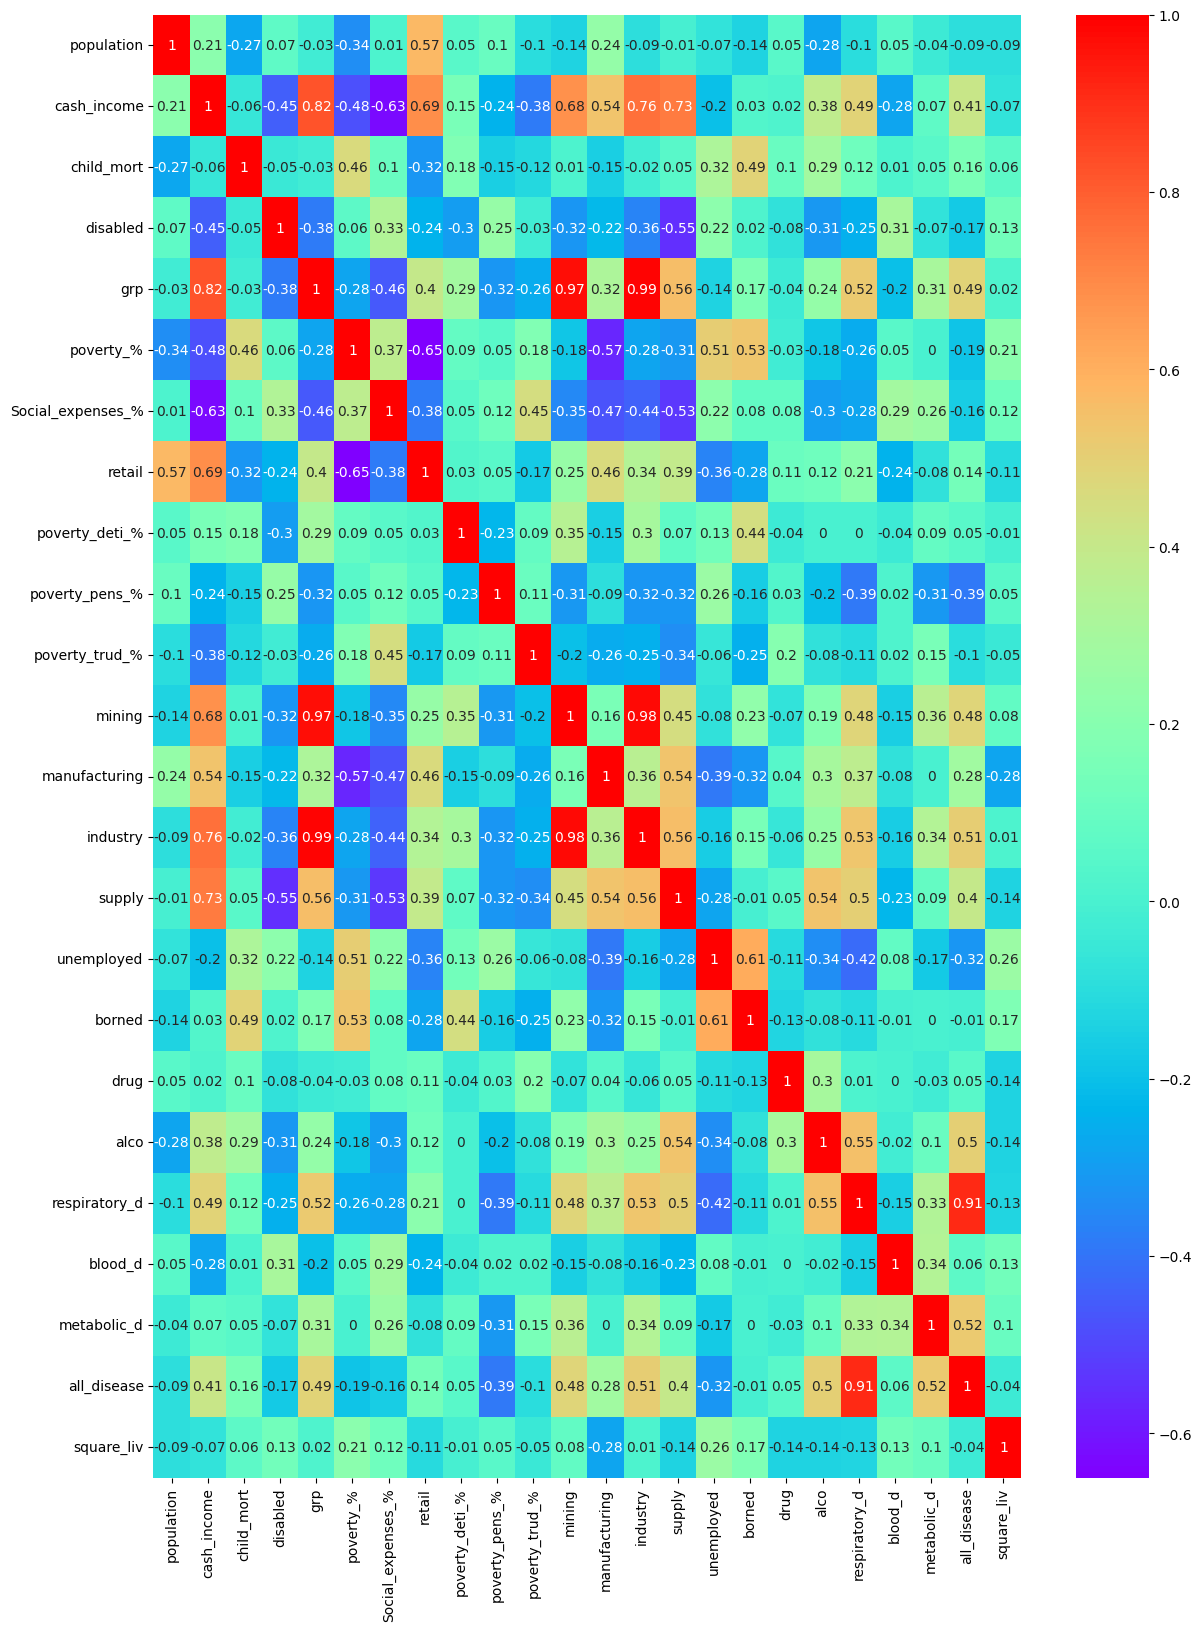

In [7]:
plt.figure(figsize=(14, 19))
sns.heatmap(result_regions.corr().round(decimals=2), cmap= "rainbow", annot=True)
plt.show()

Показатели объемов добычи полезных ископаемых и промышленности и врп (mining и industry, grp) имеют сильную линейную зависимость со значением корреляции 0,98 и 0,99, один из таких признаков можно убрать для обучения, так как они практически одинаковые. Напротив признаки бедности и оборота розничной торговли (poverty_%, retail) имеют обратную корреляцию со значением -0,65. Кроме того видно, что ВРП (grp) имеет достаточную обратную корреляцию (-0,46) с расходами на соц. политику, и практически не имеет зависимости с болезнями, безработными и малоимущим населением.

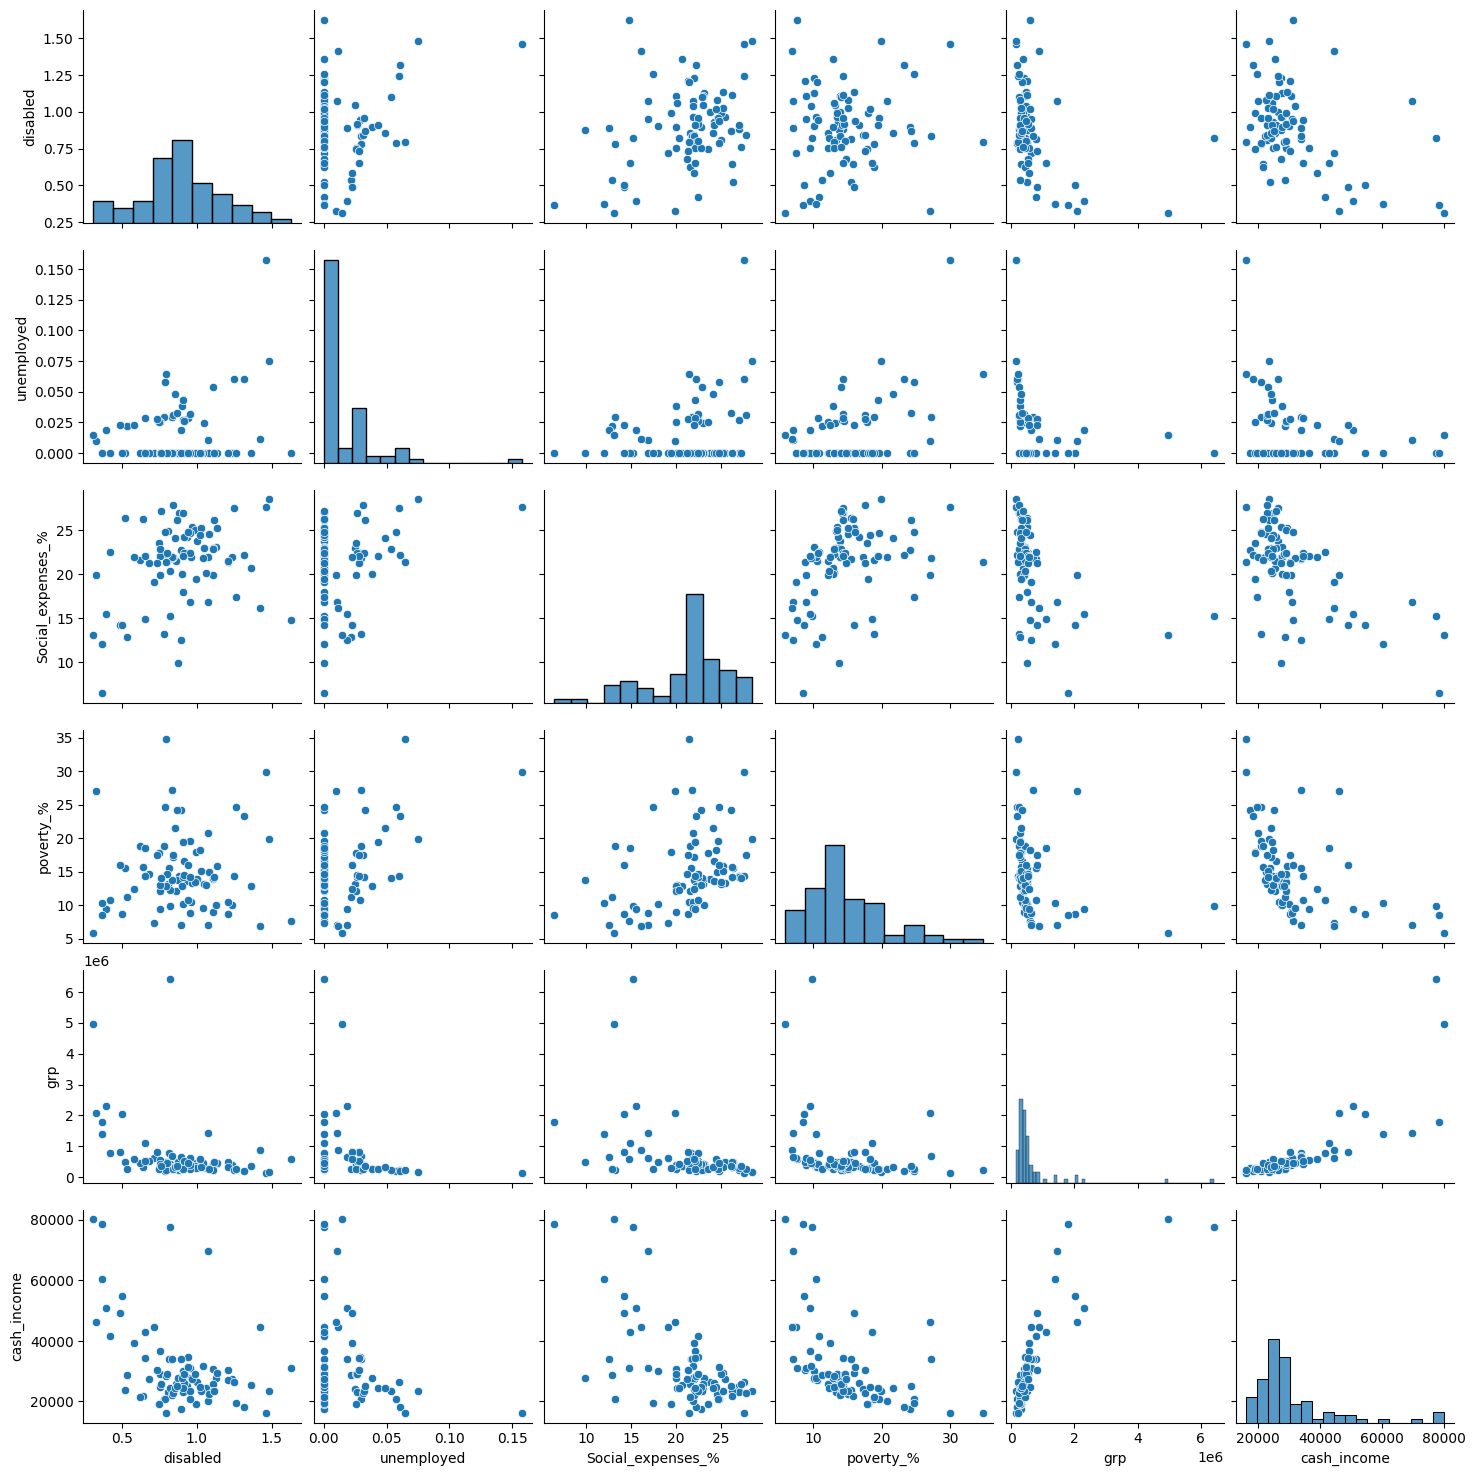

In [8]:
# Создадим матрицу диаграмм разброса для признаков описывающих бедные слои населения и врп с доходами 
sns.pairplot(result_regions, vars=['disabled','unemployed','Social_expenses_%','poverty_%','grp','cash_income'])

Как и ранее на тепловой карте корреляции, видно, что пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.
Исходя из тепловой карты уберем признаки дублирующие ВРП - industry и mining, а также respiratory дублирует общую заболеваемость

In [9]:
cols = ['population', 'cash_income', 'child_mort', 'disabled', 'grp', 'poverty_%', 'Social_expenses_%',
        'retail', 'poverty_deti_%', 'poverty_pens_%', 'poverty_trud_%', 'manufacturing', 'supply', 
        'unemployed', 'borned', 'drug', 'alco', 'blood_d', 'metabolic_d', 'all_disease', 'square_liv']
result_df = result_regions[cols].copy()
result_df.head()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,manufacturing,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1.528216e+06,31222.4,0.000044,1.628376,578765.06,7.68,14.74,216128.2,29.400,8.233333,...,453147.252133,17286.678929,0.000000,0.010295,1.6,46.1,3995.8,813.6,74637.4,17.8
Брянская область,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375,3.875000,...,190684.667322,14387.151274,0.000000,0.010074,13.2,107.9,3201.2,1641.5,77439.0,24.1
Владимирская область,1.449906e+06,24147.6,0.000052,1.044558,357923.42,13.20,22.96,162836.2,39.500,7.233333,...,341322.499987,26355.518325,0.024677,0.010033,10.7,75.7,2715.0,1265.2,94163.6,0.0
Воронежская область,2.352667e+06,30634.2,0.000041,1.107079,405518.16,8.94,19.94,234238.2,36.225,5.400000,...,207067.929373,46790.873657,0.000000,0.009670,20.1,97.1,4876.8,1589.2,55009.9,0.0
Ивановская область,1.076221e+06,25022.0,0.000040,0.880764,232553.00,14.36,26.96,163936.4,37.300,8.466667,...,155732.652827,29865.357966,0.000000,0.009846,3.8,88.6,2858.0,1676.5,88473.5,18.1


In [10]:
result_df.describe()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,manufacturing,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv
count,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.748439e+06,30796.835294,0.000058,0.893499,6.432744e+05,14.788235,21.252706,184180.477647,38.520000,6.176471,...,259328.383849,40092.022581,0.013885,0.012202,9.138824,70.481176,3119.756471,1420.935294,79982.394118,16.321176
std,1.693082e+06,13249.940010,0.000031,0.265672,8.953064e+05,5.480914,4.426399,51943.036299,5.152505,2.104495,...,192062.286404,30508.060289,0.024615,0.002790,10.368095,52.298754,962.750164,522.536177,17440.366421,4.292632
min,4.258371e+04,16234.600000,0.000000,0.309457,1.345015e+05,5.860000,6.480000,49174.200000,16.833333,0.900000,...,1635.815294,2414.833742,0.000000,0.008322,0.000000,0.000000,1357.300000,598.900000,44792.000000,0.000000
25%,7.975911e+05,23454.800000,0.000046,0.754446,3.047154e+05,10.720000,19.940000,152320.600000,36.225000,4.950000,...,134341.602330,20942.535249,0.000000,0.010509,2.200000,41.600000,2486.200000,1102.200000,67012.900000,15.500000
50%,1.241397e+06,26939.600000,0.000053,0.896733,4.270128e+05,14.000000,21.980000,180102.800000,39.425000,5.625000,...,210642.195351,32905.648989,0.000000,0.011711,8.200000,75.000000,2894.300000,1346.600000,77439.000000,16.900000
75%,2.454000e+06,31385.800000,0.000067,1.044558,5.490237e+05,17.480000,24.220000,216919.000000,41.375000,7.500000,...,392993.122939,47213.161938,0.025502,0.012782,11.300000,98.100000,3616.800000,1700.200000,89949.900000,18.100000
max,1.147229e+07,80159.800000,0.000177,1.628376,6.408588e+06,34.760000,28.480000,380821.800000,48.866667,10.975000,...,812994.315301,198939.139489,0.157784,0.024560,66.800000,331.000000,6010.800000,3885.000000,138231.700000,27.800000


>Стандартизация признаков

*Перед кластеризацией выполним стандартизацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных.*

In [11]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()
X_norm = s_scaler.fit_transform(result_df)

> ### <center> Часть 4. Кластеризация

> K-means

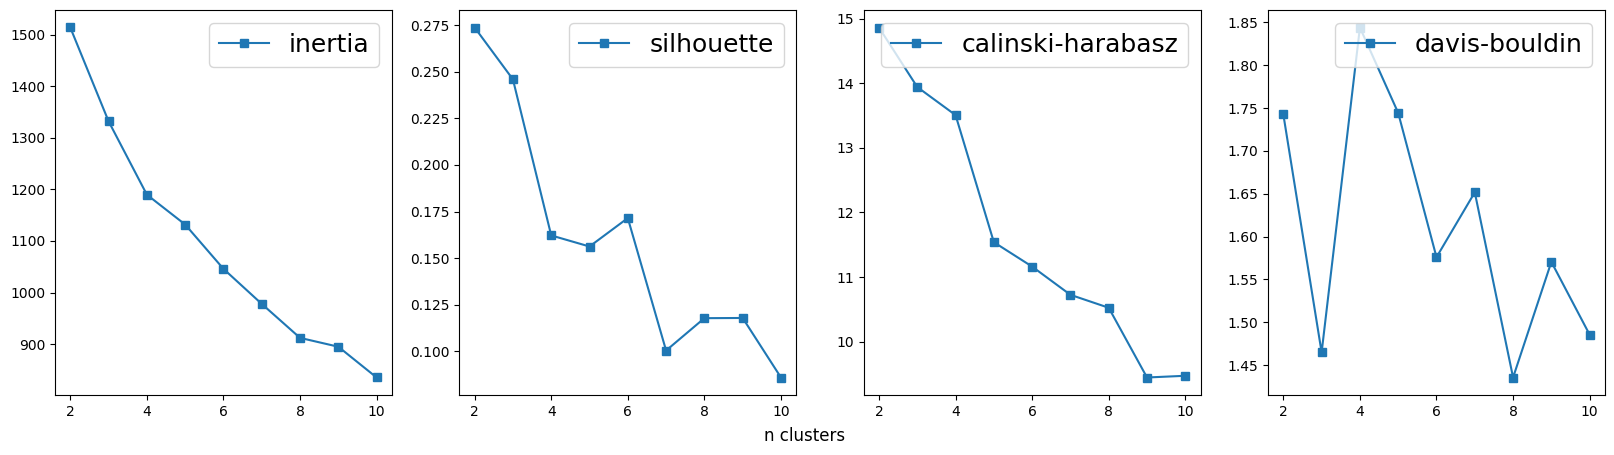

In [12]:
def plot_metrics(X):
    inertia = []
    silhouette = []
    calinski_harabasz = []
    davis_bouldin = []
    
    for i in range(2, 11):
        kmeans = cluster.KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        
    for i in range(2,11):
	    # обучаем модель k-means с текущим количеством кластеров
        kmeans = KMeans(n_clusters = i , random_state = 42 ).fit(X)
        silhouette.append(metrics.silhouette_score(X, kmeans.labels_))
        
    for i in range(2,11):
        kmeans = KMeans(n_clusters = i , random_state = 42 ).fit(X)   
        calinski_harabasz.append(metrics.calinski_harabasz_score(
            X, kmeans.labels_))
        
    for i in range(2,11):
        kmeans = KMeans(n_clusters = i , random_state = 42 ).fit(X)    
        davis_bouldin.append(metrics.davies_bouldin_score(
            X, kmeans.labels_))
        

    fig, ax = plt.subplots(1, 4, figsize=(20,5))
    ax[0].plot(range(2, 11), inertia, 's-', label='inertia')
    ax[1].plot(range(2, 11), silhouette, 's-', label='silhouette')
    ax[2].plot(range(2, 11), calinski_harabasz, 's-', label='calinski-harabasz')
    ax[3].plot(range(2, 11), davis_bouldin, 's-', label='davis-bouldin')
    ax[0].legend(prop={'size': 18})
    ax[1].legend(prop={'size': 18})
    ax[2].legend(prop={'size': 18})
    ax[3].legend(prop={'size': 18});
    fig.supxlabel('n clusters')
    
        
plot_metrics(X_norm)

Разделение кластеров нечеткое (коэффициент силуэта везде меньше 0.4, наибольшее значение при минимальном количестве кластеров). Найдем необходимое число кластеров с помощью метода локтя.

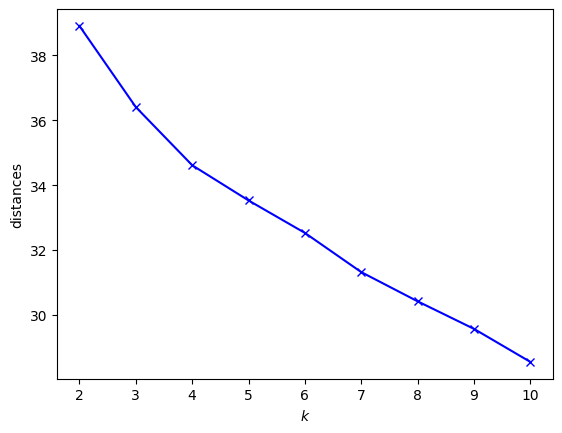

In [13]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_norm)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 11), inertia,'bx-');
plt.xlabel('$k$')
plt.ylabel('distances');

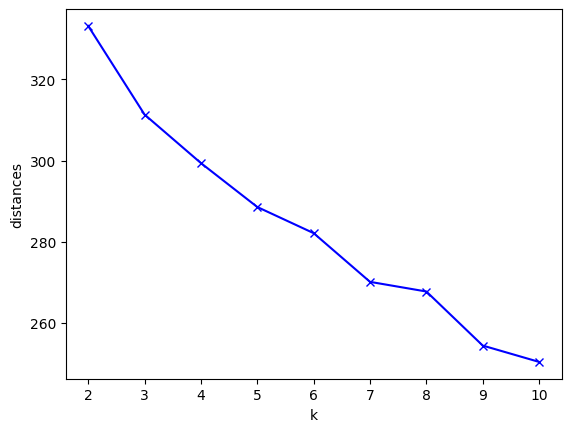

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
 
# Зададим количество кластеров от 1 до 9
clusters = range(2, 11) 
# Список расстояний между каждым объектом в каждом кластере
distances_sum = []

for k in clusters:
    kmeans_model = KMeans(n_clusters = k).fit(X_norm)
    distances_point = cdist(X_norm, kmeans_model.cluster_centers_, 'euclidean')
     # Извлечем минимальное расстояние от каждого объекта до центра его кластера и сложим их.
    distances_cluster = sum(np.min(distances_point,axis=1))
     # Запишем результаты расстояний диапазона (1, 10) 
    distances_sum.append(distances_cluster)
 
# Визуализируем полученные результаты
plt.plot(clusters, distances_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('distances')
plt.show()

В качестве графического представления результатов кластеризации используем t-SNE преобразование пятимерного признакового пространства на плоскость.

Silhouette: 0.172
Calinski-Harabatz: 11.163
Davis-Bouldin: 1.576


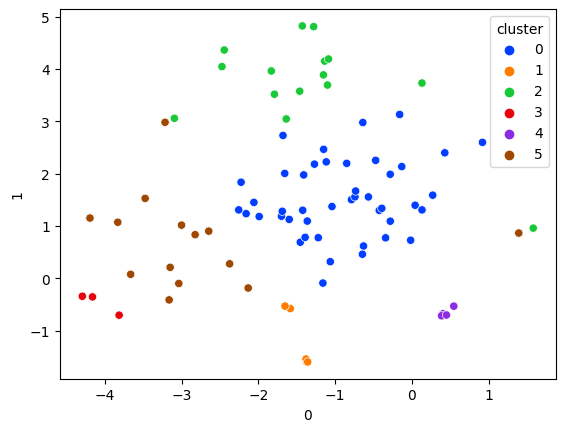

In [15]:
kmeans = cluster.KMeans(n_clusters=6, random_state=42)
bm_labels = kmeans.fit_predict(X_norm)

tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_norm))
tsne_df['cluster'] = bm_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_norm, bm_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_norm, bm_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_norm, bm_labels)))      



> Понижение размерности. PCA + k-means

Число главных компонент: 13


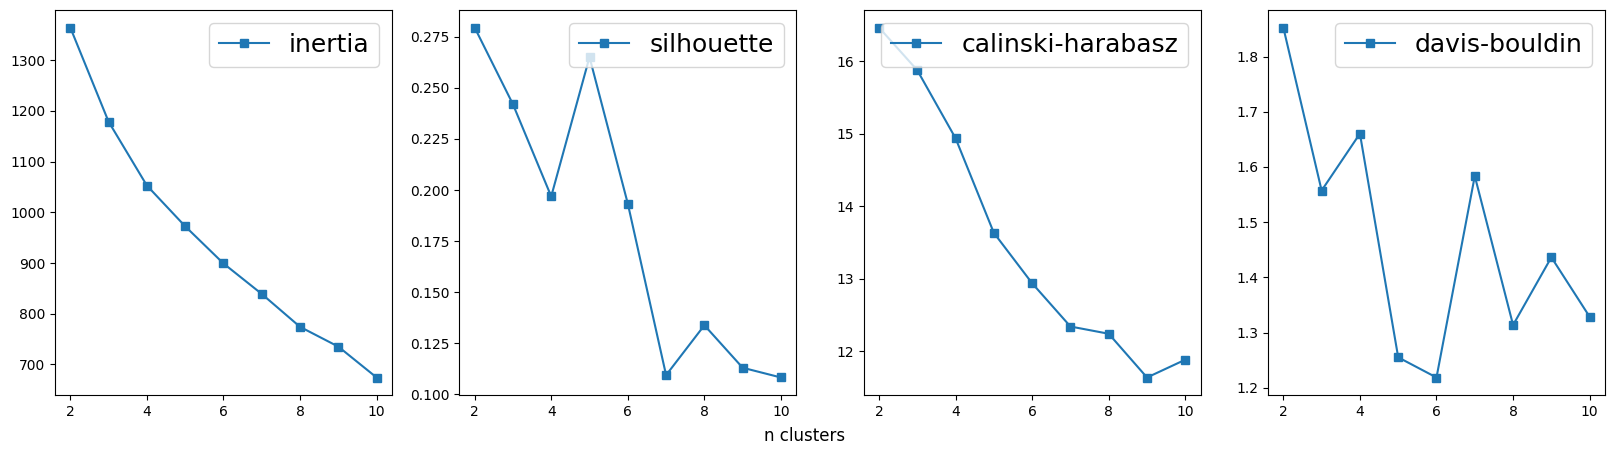

In [16]:
pca = PCA(n_components=0.9)  # 90% of explained dispersion
X_pca = pca.fit_transform(X_norm)
print(f'Число главных компонент: {pca.n_components_}')

plot_metrics(X_pca)

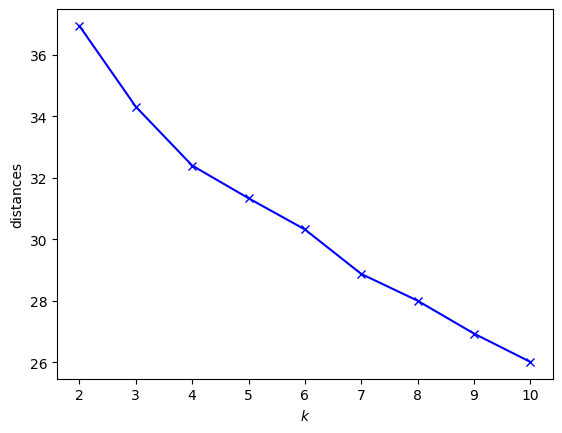

In [17]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 11), inertia,'bx-');
plt.xlabel('$k$')
plt.ylabel('distances');

По методу локтя и davis-bouldin выбираем k=6

Silhouette: 0.193
Calinski-Harabatz: 12.937
Davis-Bouldin: 1.219
Rand score (сравнение с базовой моделью): 0.806162


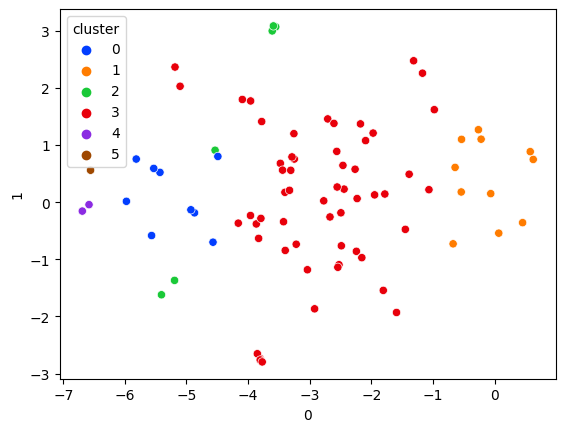

In [18]:
kmeans_pca = cluster.KMeans(n_clusters=6, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)

tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_pca))
tsne_df['cluster'] = pca_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_pca, pca_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_pca, pca_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_pca, pca_labels)))

print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, pca_labels)))

In [19]:
fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=pca_labels, width=850, height=600)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
fig.show()
fig.write_html("figs_3d/kmeans_pca.html")

![](figs_3d/kmeans_pca.png)

> Гауссовская смесь + РСА

Silhouette: 0.211
Calinski-Harabatz: 11.159
Davis-Bouldin: 1.081
Rand score (сравнение с базовой моделью): 0.662745


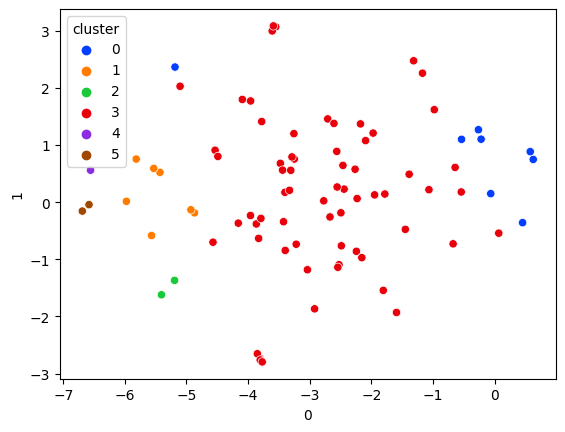

In [20]:
# Гауссова смесь, наилучший вариант: covariance_type='tied'
gmix = GaussianMixture(
    n_components=6, random_state=42, covariance_type='tied')
g_labels = gmix.fit_predict(X_pca)
tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_pca))
tsne_df['cluster'] = g_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_pca, g_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_pca, g_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_pca, g_labels)))

print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, g_labels)))

> Агломеративная кластеризация + РСА

Silhouette: 0.159
Calinski-Harabatz: 12.670
Davis-Bouldin: 1.518
Rand score (сравнение с базовой моделью): 0.756303


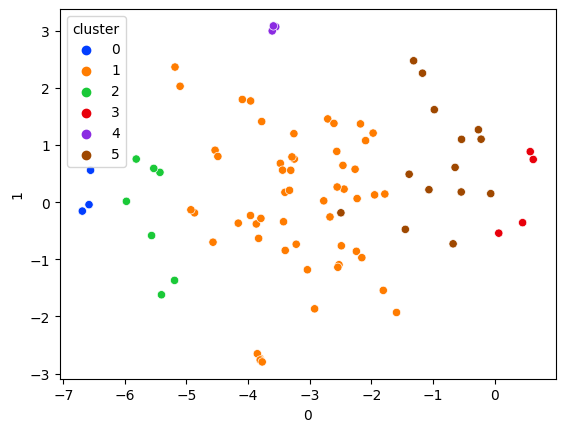

In [21]:
# Агломеративная кластеризация, наилучший вариант: linkage='ward'
tree_like = cluster.AgglomerativeClustering(n_clusters=6, linkage='ward')
ag_labels = tree_like.fit_predict(X_pca)

tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_pca))
tsne_df['cluster'] = ag_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_pca, ag_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_pca, ag_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_pca, ag_labels)))

print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, ag_labels)))

>AffinityPropagation + РСА

Silhouette: 0.103
Calinski-Harabatz: 10.704
Davis-Bouldin: 1.125
Rand score (сравнение с базовой моделью): 0.714006


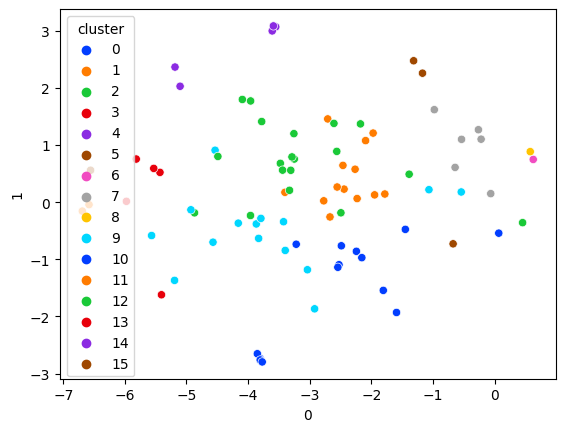

In [22]:
# Распространение сходства
aff_prop = cluster.AffinityPropagation(damping=0.9, random_state=42)
aff_labels = aff_prop.fit_predict(X_pca)

tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_pca))
tsne_df['cluster'] = aff_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_pca, aff_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_pca, aff_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_pca, aff_labels)))

print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, aff_labels)))

> Спектральная кластеризация + РСА

Silhouette: 0.145
Calinski-Harabatz: 8.604
Davis-Bouldin: 1.354
Rand score (сравнение с базовой моделью): 0.707003


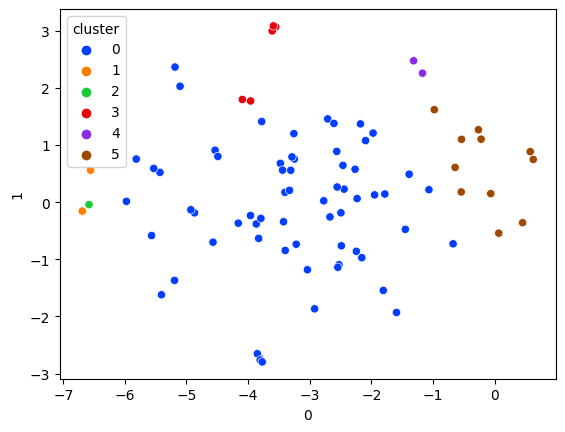

In [23]:
spectral = cluster.SpectralClustering(n_clusters=6)
sp_labels = spectral.fit_predict(X_pca)
tsne = TSNE(n_components=2, perplexity=40, init='pca',
                learning_rate='auto', random_state=42)
tsne_df = pd.DataFrame(tsne.fit_transform(X_pca))
tsne_df['cluster'] = sp_labels

fig = plt.figure()
sns.scatterplot(x=tsne_df[0], y=tsne_df[1],
                hue=tsne_df['cluster'], palette='bright');

print('Silhouette: {:.3f}'.format(
    metrics.silhouette_score(X_pca, sp_labels)))
print('Calinski-Harabatz: {:.3f}'.format(
    metrics.calinski_harabasz_score(X_pca, sp_labels)))
print('Davis-Bouldin: {:.3f}'.format(
    metrics.davies_bouldin_score(X_pca, sp_labels)))

print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, sp_labels)))


**Выводы по результатам тестирования и валидации**

Гауссова смесь показывает наилучшие метрики (коэффициент силуэта и индекс Davies-Bouldin). Наилучший коэффициент Calinski-Harabatz и индекс Рэнда у метода K-means на PCA-признаках, также коэффициент силуэта и индекс Davis-Bouldin дает не намного плохие резельтаты. Ориентируясь на результаты кластеризации в пространстве PCA-компонент (ниже),  в качестве окончательной модели выбираем "K-means на PCA-компонентах".

In [24]:
kmeans_pca = cluster.KMeans(n_clusters=6, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)
result_df['cluster'] = pca_labels
# Упорядочим нумерацию кластеров 
result_df.to_csv('social_russia_data/russia_region_clusters.csv')
result_df['cluster'].to_csv('social_russia_data/labels.csv')

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=result_df['cluster'], width=850, height=600)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
fig.show()
fig.write_html('figs_3d/kmeans_pca.html')

![](figs_3d/kmeans_pca.png)

In [25]:
result_df

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1.528216e+06,31222.4,0.000044,1.628376,578765.06,7.68,14.74,216128.2,29.400000,8.233333,...,17286.678929,0.000000,0.010295,1.6,46.1,3995.8,813.6,74637.4,17.8,2
Брянская область,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375000,3.875000,...,14387.151274,0.000000,0.010074,13.2,107.9,3201.2,1641.5,77439.0,24.1,3
Владимирская область,1.449906e+06,24147.6,0.000052,1.044558,357923.42,13.20,22.96,162836.2,39.500000,7.233333,...,26355.518325,0.024677,0.010033,10.7,75.7,2715.0,1265.2,94163.6,0.0,3
Воронежская область,2.352667e+06,30634.2,0.000041,1.107079,405518.16,8.94,19.94,234238.2,36.225000,5.400000,...,46790.873657,0.000000,0.009670,20.1,97.1,4876.8,1589.2,55009.9,0.0,3
Ивановская область,1.076221e+06,25022.0,0.000040,0.880764,232553.00,14.36,26.96,163936.4,37.300000,8.466667,...,29865.357966,0.000000,0.009846,3.8,88.6,2858.0,1676.5,88473.5,18.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,8.434916e+05,31385.8,0.000058,0.938310,451290.98,16.04,24.74,216919.0,38.200000,5.625000,...,50694.970865,0.000000,0.012472,18.9,92.3,2132.2,1147.3,83412.0,17.3,3
Магаданская область,1.627438e+05,60442.2,0.000040,0.370022,1392228.04,10.32,12.04,225678.0,36.233333,8.766667,...,117042.841726,0.000000,0.010973,11.6,161.9,1453.4,1146.6,67012.9,13.8,0
Сахалинская область,5.125763e+05,54707.6,0.000050,0.504018,2029395.38,8.70,14.26,307109.8,38.066667,7.600000,...,37494.058034,0.000000,0.012408,15.4,141.4,2228.6,1302.9,83995.5,17.2,0


In [26]:
result_df['cluster'] = pca_labels
result_df['cluster'].value_counts()

3    56
1    11
0     9
2     6
4     2
5     1
Name: cluster, dtype: int64

> ### Описание кластеров

In [27]:
cluster_0 = list(result_df[result_df['cluster']==0].index)
print (', '.join(cluster_0))
result_df.loc[result_df['cluster'] == 0].describe()

Мурманская область, Свердловская область, Тюменская область, Ханты-Мансийский автономный округ — Югра, Республика Саха (Якутия), Камчатский край, Хабаровский край, Магаданская область, Сахалинская область


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,1.501930e+06,46871.022222,0.000052,0.498777,1.289039e+06,13.644444,17.473333,242060.488889,41.436111,5.707407,...,76578.909186,0.008245,0.012987,9.922222,102.333333,2418.155556,1321.366667,79748.622222,16.033333,0.0
std,1.456886e+06,7694.004619,0.000023,0.140849,6.867699e+05,6.027236,4.089205,32796.590050,3.675309,1.976390,...,31799.328585,0.010438,0.001847,5.305369,58.391117,659.492237,424.091105,13202.961201,1.526434,0.0
min,1.627438e+05,36626.200000,0.000000,0.325403,5.490237e+05,8.700000,12.040000,183505.600000,36.233333,3.000000,...,37494.058034,0.000000,0.010673,0.000000,0.000000,1453.400000,641.500000,64208.600000,13.800000,0.0
25%,5.125763e+05,41757.600000,0.000047,0.392276,7.687333e+05,9.480000,14.260000,225853.800000,38.066667,4.700000,...,56700.166666,0.000000,0.011956,9.200000,74.100000,2204.800000,1133.100000,67303.600000,15.400000,0.0
50%,9.611463e+05,46283.200000,0.000058,0.488991,1.099324e+06,10.780000,15.520000,246843.000000,41.550000,5.050000,...,69952.638655,0.000000,0.012438,10.200000,75.500000,2247.000000,1302.100000,77458.300000,15.900000,0.0
75%,1.536470e+06,50827.200000,0.000060,0.581831,2.029395e+06,15.960000,21.980000,248889.600000,44.450000,7.600000,...,88223.901195,0.018744,0.015025,14.300000,146.500000,2471.200000,1741.800000,87319.000000,17.200000,0.0
max,4.371458e+06,60442.200000,0.000078,0.751244,2.302429e+06,27.080000,22.480000,307109.800000,46.725000,8.766667,...,132684.522515,0.022751,0.015663,15.400000,180.900000,3920.700000,1929.600000,104555.100000,18.100000,0.0


>в "cluster 1" вошли:
- c относительно высокими показателями ВРП
- с относительно средневысокими показателями среднедушевого дохода
- с относительно высоким оборотом розничной торговли
"зона комфорта" - эти регионы, по-видимому, можно считать наиболее комфортными для жизни в РФ. Заработки выше среднего (хотя и значительно ниже, чем у "бизнес-регионов" кластера 2, 4, 5), относительно высокий ВРП (соответственно более высокое наполнение региональных бюджетов), относительно высокий объем розничной торговли, средний процент бедного населения (13.64%).

In [28]:
cluster_1 = list(result_df[result_df['cluster']==1].index)
print (', '.join(cluster_1))
result_df.loc[result_df['cluster'] == 1].describe()

Республика Калмыкия, Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Республика Алтай, Республика Тыва (Тува), Республика Бурятия, Забайкальский край


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,8.617388e+05,21000.509091,0.000091,1.100558,225812.594545,22.794545,23.741818,123328.509091,39.050000,6.822727,...,14810.122779,0.056548,0.016967,2.254545,28.636364,3066.454545,1248.890909,65745.900000,18.690909,1.0
std,7.447247e+05,3660.591201,0.000049,0.264226,57666.531485,6.099889,3.248365,48225.315019,5.925464,2.797554,...,8513.510726,0.041635,0.004266,3.331475,42.058062,1015.152292,348.351335,12506.706717,3.931273,0.0
min,2.090464e+05,16234.600000,0.000000,0.787346,134501.460000,14.080000,17.420000,49174.200000,27.025000,1.950000,...,2414.833742,0.000000,0.012234,0.000000,0.000000,1872.300000,844.900000,44792.000000,13.600000,1.0
25%,3.775412e+05,17874.900000,0.000069,0.875440,188577.540000,19.700000,22.110000,79402.100000,35.125000,4.675000,...,10653.075990,0.046003,0.013665,0.000000,0.000000,2496.000000,1020.150000,60652.100000,16.750000,1.0
50%,7.037073e+05,20888.400000,0.000080,1.104284,221798.320000,23.260000,22.860000,120855.000000,39.800000,6.650000,...,13110.448896,0.057843,0.015745,0.000000,0.000000,2860.400000,1162.500000,63347.100000,18.300000,1.0
75%,1.045664e+06,23885.600000,0.000126,1.287167,255506.720000,24.620000,26.150000,157539.600000,44.437500,9.225000,...,17647.645572,0.062647,0.019271,4.600000,59.700000,3378.800000,1376.900000,72052.850000,19.700000,1.0
max,2.832146e+06,26595.200000,0.000177,1.480570,321327.440000,34.760000,28.480000,192674.600000,46.025000,10.975000,...,31746.910390,0.157784,0.024560,8.600000,110.700000,5470.300000,2116.900000,89433.500000,27.800000,1.0


>Видно, что в "cluster 1" попали регионы:
- с самыми низкими показателями ВРП, среднедушевым доходом населения, среднедушевым оборотом розничной торговли,  
- высоким уровнем безработицы, рождаемости, людей с инвалидностью, людей за чертой бедности, расходами на социальную политику.
- Интересно, что одновременно этот кластер демонстрирует самую высокую среднюю жилплощадь на человека.

In [29]:
cluster_2 = list(result_df[result_df['cluster']==2].index)
print (', '.join(cluster_2))
result_df.loc[result_df['cluster'] == 2].describe()

Белгородская область, Московская область, г. Москва, Ленинградская область, г. Санкт-Петербург, Республика Татарстан (Татарстан)


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,6.000000e+00,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,5.098766e+06,42558.066667,0.000030,1.113990,7.931319e+05,7.490000,16.016667,269383.833333,31.561111,7.541667,...,45611.253204,0.006735,0.010707,9.233333,39.433333,2819.016667,1099.750000,76145.316667,15.883333,2.0
std,3.744140e+06,14748.793548,0.000025,0.343668,3.324880e+05,0.761656,2.219240,64284.421014,12.309710,2.226532,...,22236.766536,0.007906,0.001412,4.092758,13.037433,837.932602,423.662506,13530.189177,1.453845,0.0
min,1.528216e+06,30997.600000,0.000000,0.717203,5.787651e+05,6.880000,12.500000,216128.200000,16.833333,3.266667,...,17286.678929,0.000000,0.008322,1.600000,22.100000,1482.100000,706.400000,64633.300000,13.800000,2.0
25%,2.263572e+06,31930.100000,0.000008,0.907945,6.111737e+05,7.010000,15.085000,223634.400000,20.425000,7.687500,...,36196.733089,0.000000,0.010363,9.100000,29.075000,2506.425000,809.250000,67503.925000,15.025000,2.0
50%,4.396612e+06,39284.100000,0.000037,1.013888,6.293775e+05,7.230000,16.480000,245067.100000,34.525000,8.016667,...,38334.540179,0.005311,0.010807,9.950000,43.850000,2975.900000,964.000000,72345.700000,15.950000,2.0
75%,6.533884e+06,44663.650000,0.000045,1.331935,8.188028e+05,7.615000,16.840000,295813.250000,40.662500,8.452083,...,58986.723372,0.011008,0.011352,11.025000,47.150000,3094.825000,1280.300000,78205.525000,16.800000,2.0
max,1.147229e+07,69847.000000,0.000058,1.628376,1.434221e+06,8.920000,19.060000,380821.800000,45.050000,9.775000,...,78356.844773,0.018650,0.012557,13.700000,54.400000,3995.800000,1820.700000,101498.400000,17.800000,2.0


>в "cluster 2" попали: "бизнес-регионы"
- с высокими показателями ВРП, среднедушевого дохода
- с самым большим оборотом розничной торговли
- с самым низким % людей за чертой бедности

In [30]:
cluster_3 = list(result_df[result_df['cluster']==3].index)
print (', '.join(cluster_3))
result_df.loc[result_df['cluster'] == 3].describe()

Брянская область, Владимирская область, Воронежская область, Ивановская область, Калужская область, Костромская область, Курская область, Липецкая область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тверская область, Тульская область, Ярославская область, Республика Карелия, Республика Коми, Архангельская область, Вологодская область, Калининградская область, Новгородская область, Псковская область, Республика Адыгея (Адыгея), Республика Крым, Краснодарский край, Астраханская область, Волгоградская область, Ростовская область, г. Севастополь, Ставропольский край, Республика Башкортостан, Республика Марий Эл, Республика Мордовия, Удмуртская Республика, Чувашская Республика — Чувашия, Пермский край, Кировская область, Нижегородская область, Оренбургская область, Пензенская область, Самарская область, Саратовская область, Ульяновская область, Курганская область, Челябинская область, Республика Хакасия, Алтайский край, Красноярский край, Иркутская область

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,1.685846e+06,26308.310714,0.000053,0.913793,405109.678214,14.541786,22.448214,175797.439286,38.449256,6.224107,...,33797.725638,0.007660,0.011173,10.675000,71.001786,3290.642857,1468.732143,80637.392857,15.921429,3.0
std,1.079772e+06,3834.431032,0.000018,0.174112,123040.665057,3.500450,3.358491,30227.957216,2.752849,1.676284,...,16028.161276,0.012938,0.001253,11.896252,37.970905,986.484793,525.699313,14845.325841,4.795631,0.0
min,1.759422e+05,19023.400000,0.000000,0.520736,227127.240000,8.740000,9.860000,115042.000000,32.900000,3.250000,...,6654.680236,0.000000,0.008805,0.000000,0.000000,1357.300000,598.900000,52086.600000,0.000000,3.0
25%,9.544887e+05,23495.600000,0.000047,0.805419,314549.885000,12.905000,21.430000,152123.800000,36.300000,5.143750,...,22044.145274,0.000000,0.010192,3.700000,54.300000,2538.200000,1117.750000,70638.825000,15.675000,3.0
50%,1.295667e+06,25777.700000,0.000052,0.909883,403667.220000,14.100000,22.400000,174793.900000,38.987500,5.625000,...,32349.730336,0.000000,0.011068,8.200000,78.600000,3121.350000,1407.700000,80136.050000,16.900000,3.0
75%,2.458698e+06,29098.250000,0.000063,1.029784,475342.210000,15.950000,24.665000,196023.050000,40.187500,7.114583,...,39857.245029,0.022513,0.012180,13.375000,97.375000,3756.650000,1710.050000,91247.575000,18.025000,3.0
max,5.325705e+06,34628.600000,0.000124,1.359854,807521.720000,27.140000,27.820000,244479.800000,43.875000,10.633333,...,96799.642329,0.038606,0.014070,66.800000,137.900000,6010.800000,3885.000000,112764.700000,24.100000,3.0


>в "cluster 3":

наиболее наполненный кластер "среднестатистических регионов". Медианные показатели (в расчете на одного человека): зарплата более менее средние показатели, валовый региональный продукт около 400 т.р., годовой объем розничной торговли средний, жилплощадь около 16 кв.м, 14.54% населения за чертой бедности.

In [31]:
cluster_4 = list(result_df[result_df['cluster']==4].index)
print (', '.join(cluster_4))
result_df.loc[result_df['cluster'] == 4].describe()

Ненецкий автономный округ, Ямало-Ненецкий автономный округ


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,284152.958333,78889.900000,0.000064,0.565390,5.683900e+06,7.850000,14.190000,233799.600000,48.283333,1.941667,...,95210.545845,0.007304,0.015273,4.750000,105.600000,2685.300000,2506.000000,128244.300000,18.200000,4.0
std,341630.509602,1795.909803,0.000014,0.361944,1.024863e+06,2.814285,1.513209,22434.235425,0.824958,1.261007,...,6595.371135,0.010330,0.000497,6.717514,10.606602,151.038008,807.798787,14124.316533,3.818377,0.0
min,42583.708333,77620.000000,0.000055,0.309457,4.959213e+06,5.860000,13.120000,217936.200000,47.700000,1.050000,...,90546.914191,0.000000,0.014922,0.000000,98.100000,2578.500000,1934.800000,118256.900000,15.500000,4.0
25%,163368.333333,78254.950000,0.000059,0.437424,5.321557e+06,6.855000,13.655000,225867.900000,47.991667,1.495833,...,92878.730018,0.003652,0.015098,2.375000,101.850000,2631.900000,2220.400000,123250.600000,16.850000,4.0
50%,284152.958333,78889.900000,0.000064,0.565390,5.683900e+06,7.850000,14.190000,233799.600000,48.283333,1.941667,...,95210.545845,0.007304,0.015273,4.750000,105.600000,2685.300000,2506.000000,128244.300000,18.200000,4.0
75%,404937.583333,79524.850000,0.000069,0.693357,6.046244e+06,8.845000,14.725000,241731.300000,48.575000,2.387500,...,97542.361672,0.010956,0.015449,7.125000,109.350000,2738.700000,2791.600000,133238.000000,19.550000,4.0
max,525722.208333,80159.800000,0.000074,0.821323,6.408588e+06,9.840000,15.260000,249663.000000,48.866667,2.833333,...,99874.177499,0.014608,0.015625,9.500000,113.100000,2792.100000,3077.200000,138231.700000,20.900000,4.0


>в "cluster 4" вошли регионы:
- с самыми высокими среднедущевыми доходами, уровнем ВРП

In [32]:
cluster_5 = list(result_df[result_df['cluster']==5].index)
print (', '.join(cluster_5))
result_df.loc[result_df['cluster'] == 5].describe()

Чукотский автономный округ


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv,cluster
count,1.000,1.0,1.00000,1.000000,1.00,1.00,1.00,1.0,1.000000,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0
25%,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0
50%,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0
75%,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0
max,52577.125,78492.6,0.00016,0.365111,1780297.36,8.48,6.48,191623.8,32.633333,0.9,...,198939.139489,0.0,0.013147,0.0,331.0,3124.2,1289.9,128506.5,14.1,5.0


In [69]:
col = 'poverty_deti_%'  # колонка
cluster = 2     # кластер

mask = result_df['cluster'] == cluster
result_df[mask][col].sort_values(ascending=False)

Регион
Московская область                  45.050000
Республика Татарстан (Татарстан)    41.000000
г. Москва                           39.650000
Белгородская область                29.400000
г. Санкт-Петербург                  17.433333
Ленинградская область               16.833333
Name: poverty_deti_%, dtype: float64

>в "cluster 5" 

вошел регион - Чукотский автономный округ, который характеризуется самой низкой численностью населения, высоким среднедушевым доходом, самой высокой детской смертностью, со средним ВРП, самыми низкими расходами на социальную политику, отсутствием безработицы, наркомании и аномальрно высоким алкоголизмом

> ### Предсказание модели
*Мы построили модель кластеризации. Чтобы сделать предсказание давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров.*

In [33]:
X = result_df.drop(['cluster'], axis=1)
y = result_df[['cluster']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42, test_size = 0.2)

In [34]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_GBC= model_selection.GridSearchCV(
    estimator=ensemble.GradientBoostingClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_GBC.fit(X_train, y_train).predict(X_test)
print("Best parameters:", grid_GBC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy: 0.647


In [35]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_RFC = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_RFC.fit(X_train, y_train).predict(X_test)
print("Best parameters:",grid_RFC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.824


In [37]:
# Сохранение выбранной обученной модели в файл pickle
with open("social_russia_data\Test\grid_RFC.pkl", "wb") as f:
    pickle.dump(grid_RFC, f)

In [38]:
# Загрузка сохраненной модели из файла pickle
with open("social_russia_data\Test\grid_RFC.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [43]:
# создадим тестовый набор 
data = [
    ('168811', '28222.4' ,'0.000044', '1.73', '678764', '5.68', '11.74', '216128.2', 
     '19.050', '8.175', '17.775', '483.14', '16.28', '0.0003', '0.010295', '2.19', '41.2', '3895.8', 
     '799.6', '71637.4', '16.4'),
    ('1.288930e+06', '26533.0','0.000053', '1.001405', '304715.44', '13.92', '23.76', '206798.0',
     '41.375', '3.875', '54.775', '190.684667', '14.387151', '0.000000', '0.010074', '10.000000',
     '94.100000', '3201.2', '1641.5', '77439.0', '24.1')
]

columns = ['population', 'cash_income', 'child_mort', 'disabled', 'grp',
       'poverty_%', 'Social_expenses_%', 'retail', 'poverty_deti_%',
       'poverty_pens_%', 'poverty_trud_%', 'manufacturing', 'supply',
       'unemployed', 'borned', 'drug', 'alco', 'blood_d', 'metabolic_d', 'all_disease',
       'square_liv']

df_test = pd.DataFrame(data, columns=columns)

df_test.head()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,manufacturing,supply,unemployed,borned,drug,alco,blood_d,metabolic_d,all_disease,square_liv
0,168811,28222.4,0.000044,1.73,678764,5.68,11.74,216128.2,19.050,8.175,...,483.14,16.28,0.0003,0.010295,2.19,41.2,3895.8,799.6,71637.4,16.4
1,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375,3.875,...,190.684667,14.387151,0.000000,0.010074,10.000000,94.100000,3201.2,1641.5,77439.0,24.1


In [44]:
y_pred = loaded_model.predict(df_test)
print(y_pred)

[3 3]


>Выводы:

Дано описание характерных особенностей полученных кластеров:
- бедные регионы;
- среднестатистические регионы;
- регионы "комфорт"
- бизнес-регионы.
- кластер 4 выделила тоже в отдельный кластер, у него самые высокие показатели, дабы не портить картину. И в этих кластерах самые малочисленные регионы попали.
- кластер 5 выделила в отдельный кластер, так например 4 кластер при сравнительно высоком среднедушевом доходе, отсутствии безработицы и аномально огромным алкоголизме, если соединить их с другими кластерами, то картина совсем иная получится.

Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми из регионов кластера 1 (Республика Калмыкия, Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Республика Алтай, Республика Тыва (Тува), Республика Бурятия, Забайкальский край). 
При этом в кластере наиболее бедных регионов наблюдается:
- самые низкие показатели ВРП, среднедушевого дохода населения, среднедушевого оборота розничной торговли,  
- высокий уровень безработицы, рождаемости, людей с инвалидностью, людей за чертой бедности, расходов на социальную политику.
- Интересно, что одновременно этот кластер демонстрирует самую высокую среднюю жилплощадь на человека.

итоги:
* Уровень бедности/социального неблагополучия оказался тесно связан с производством и потреблением в регионе.
Например, кластер 2, в котором максимальный показатель оборота розничной торговли на душу населения, и, как следствие, минимальное количество людей, живущих за чертой бедности и детей в малоимущих семьях.
* уровень малоимущих детей меньше всего в бизнес кластере 2, однако в других кластерах он не сильно различается между собой.
* Больше всего уязвимы регионы на дотациях.
* Также выявлено большое расслоение в доходах в разрезе кластера 3, , хотя считается, что он среднестатистический.
Поэтому я бы обратила внимание на кластер 3(отборочно внутри кластерно). Считаю, что он тоже уязвим.